In [1]:
import torch
import numpy as np
import random

random_seed = 12
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [2]:
!pwd

/data/notebook/competition/cv-12/EDA


In [3]:
train_dir_path = '../../input/data/train/'
train_csv_path = train_dir_path + 'train.csv'

----

In [4]:
import pandas as pd
train_csv = pd.read_csv(train_csv_path)
train_csv.head()

id  gender   race  age                    path
0  000001  female  Asian   45  000001_female_Asian_45
1  000002  female  Asian   52  000002_female_Asian_52
2  000004    male  Asian   54    000004_male_Asian_54
3  000005  female  Asian   58  000005_female_Asian_58
4  000006  female  Asian   59  000006_female_Asian_59

In [6]:
import os.path
import cv2

def get_files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield os.path.join(path, file)

img_size = (0, 0)
all_file_exists = True
all_file_same_size = True
for i in range(len(train_csv)):
    filepath = train_dir_path + f"images/{train_csv.iloc[i]['path']}/"
    files = list(get_files(filepath))
    if len(files) != 7:
        print(f"Index[{i}] : Path [{filepath}] → File len : {len(files)}")
        all_file_exists = False
    for _, filepath in enumerate(files):
        img = cv2.imread(filepath)
        if img_size != (img.shape[0], img.shape[1]):
            if img_size != (0, 0):
                all_file_same_size = False
            img_size = (img.shape[0], img.shape[1])

print(f"All File Exists (7 Files) : {all_file_exists}")
print(f"All File Same size ({img_size[0]}, {img_size[1]}) : {all_file_exists}")

All File Exists (7 Files) : True
All File Same size (512, 384) : True


----

In [77]:
import os
import matplotlib.pyplot as plt
import cv2

def get_files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield os.path.join(path, file)

train_samples = train_csv.sample(50)
def show_photos(person_id):
    plt.figure(figsize=(20,20))
    columns = 7
    files = list(get_files(train_dir_path + f"images/{train_samples.iloc[person_id]['path']}/"))
    for i, filepath in enumerate(files):
        img = cv2.imread(filepath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(files) // columns + 1, columns, i + 1)
        plt.imshow(img)

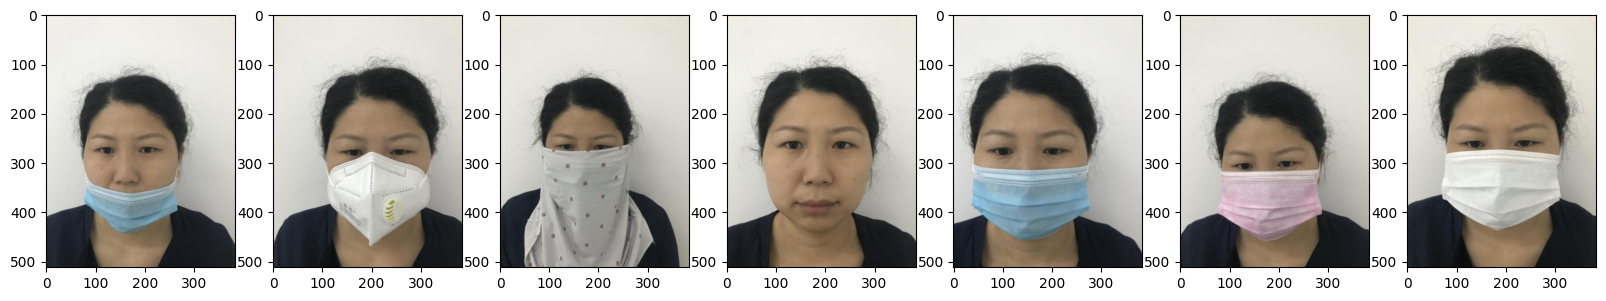

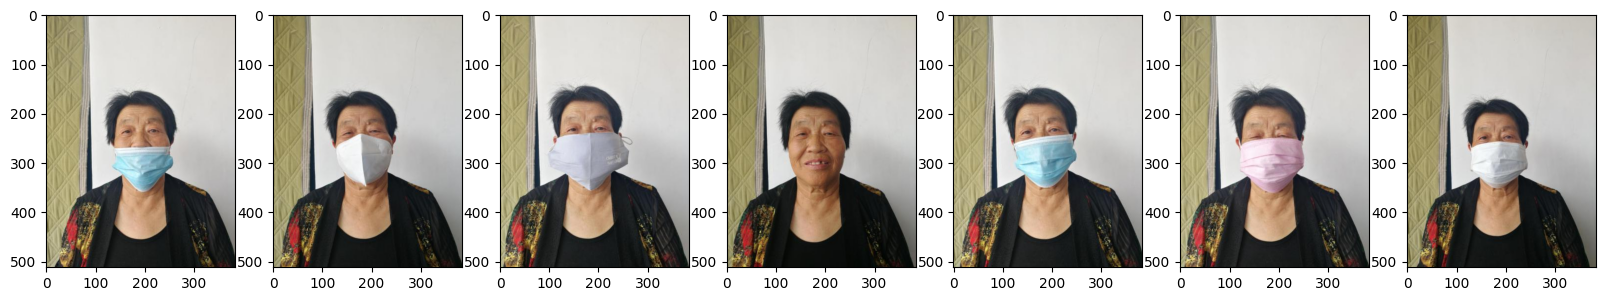

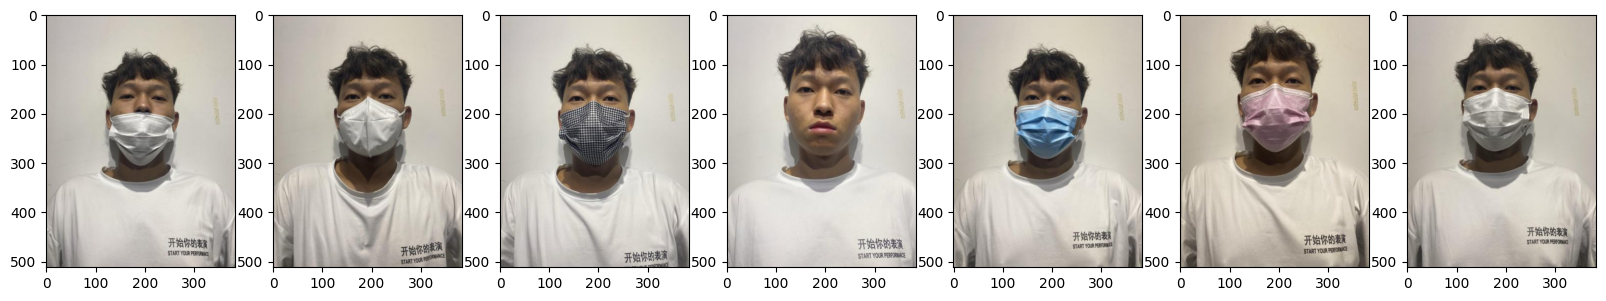

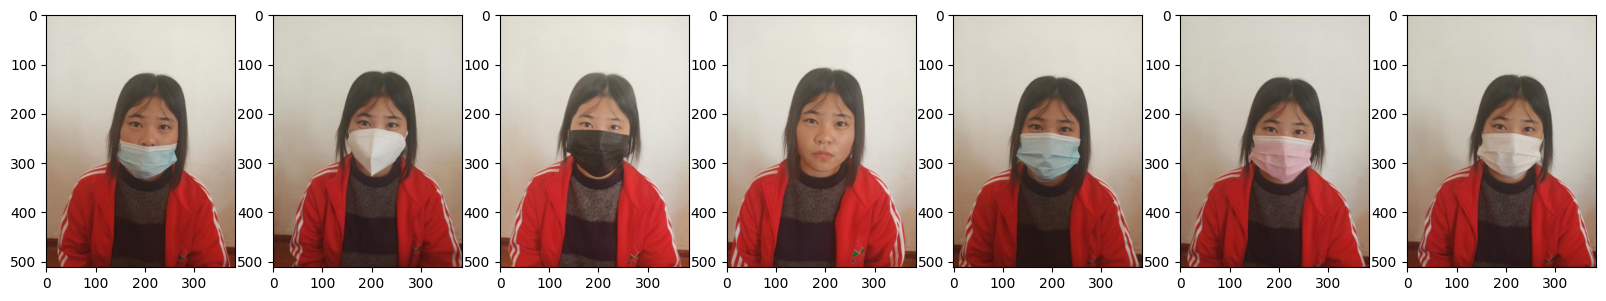

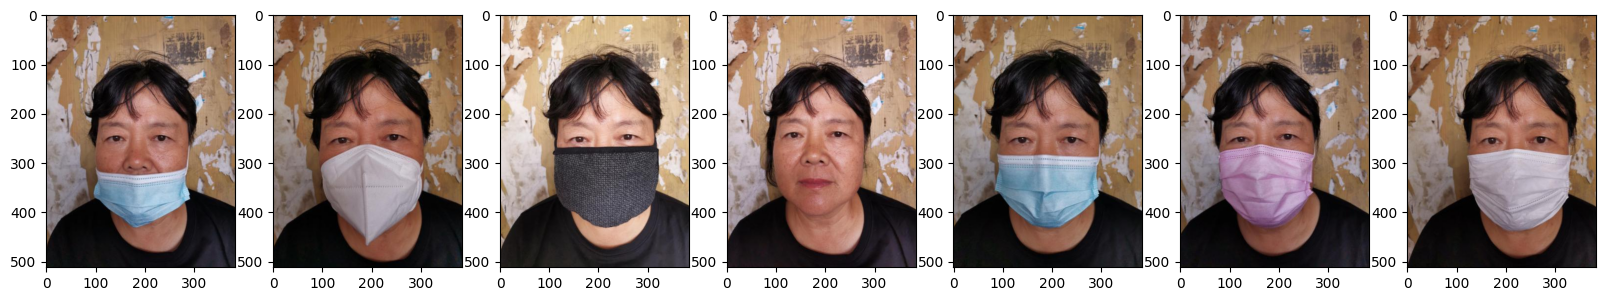

In [78]:
for i in range(5):
    show_photos(i)

----

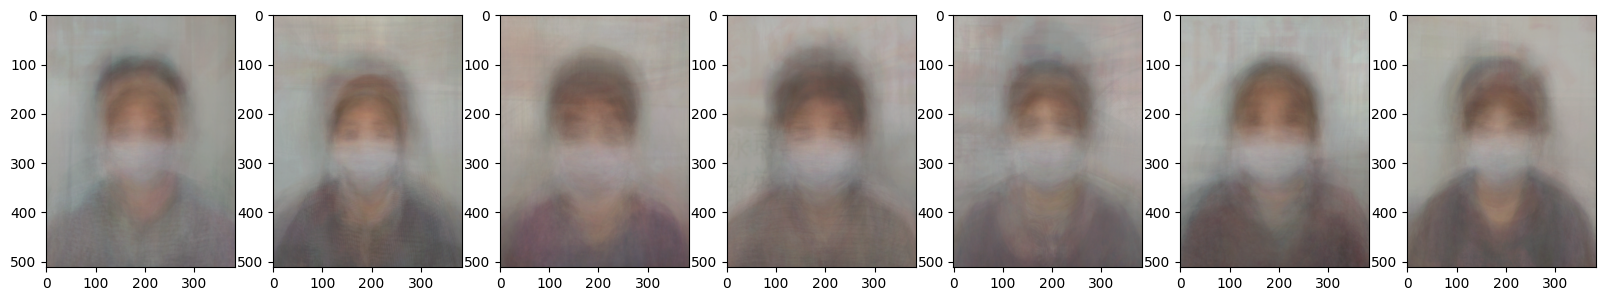

In [79]:
import os
import matplotlib.pyplot as plt
import cv2

def get_files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield os.path.join(path, file)

def blending_photos(blending_size):
    plt.figure(figsize=(20,12))
    columns = 7
    for col in range(columns):
        train_shuffles = train_csv.sample(blending_size)
        target_img = None
        for pid, person_id in enumerate(range(len(train_shuffles))):
            files = list(get_files(train_dir_path + f"images/{train_shuffles.iloc[person_id]['path']}/"))
            for idx, f in enumerate(files):
                source_img = cv2.imread(f)
                source_img = cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB)
                if target_img is None:
                    target_img = source_img
                    continue
                source_weight = 1 / ((pid * 7) + idx + 1)
                target_weight = 1 - source_weight
                target_img = cv2.addWeighted(target_img, target_weight, source_img, source_weight, 0)
        plt.subplot(1, columns, col + 1)
        plt.imshow(target_img)

blending_photos(20) # 20명씩 blending * 7패턴

----
Submission checker
----

In [86]:
eval_dir_path = '../../input/data/eval/'
submissions_csv_path = eval_dir_path + 'submission_resnet152.csv'

In [87]:
import pandas as pd
submissions_csv = pd.read_csv(submissions_csv_path)
output_samples = submissions_csv.sample(7)
output_samples.head()

ImageID  ans
5450  1f20a3d8a7e80e71105868d0e2a2ef32e1516357.jpg    0
4062  9c9ef14e8b3aa40c17cb93a837ecdd6613f7e681.jpg    1
1055  5761f8f59baaef14d36021bdd23f239a76334f0b.jpg    6
3162  e66ece821d821827cf6607db49baa65fffbc1f8e.jpg    4
8760  8737dd7c87d041669aaacf658700573a951f345a.jpg    7

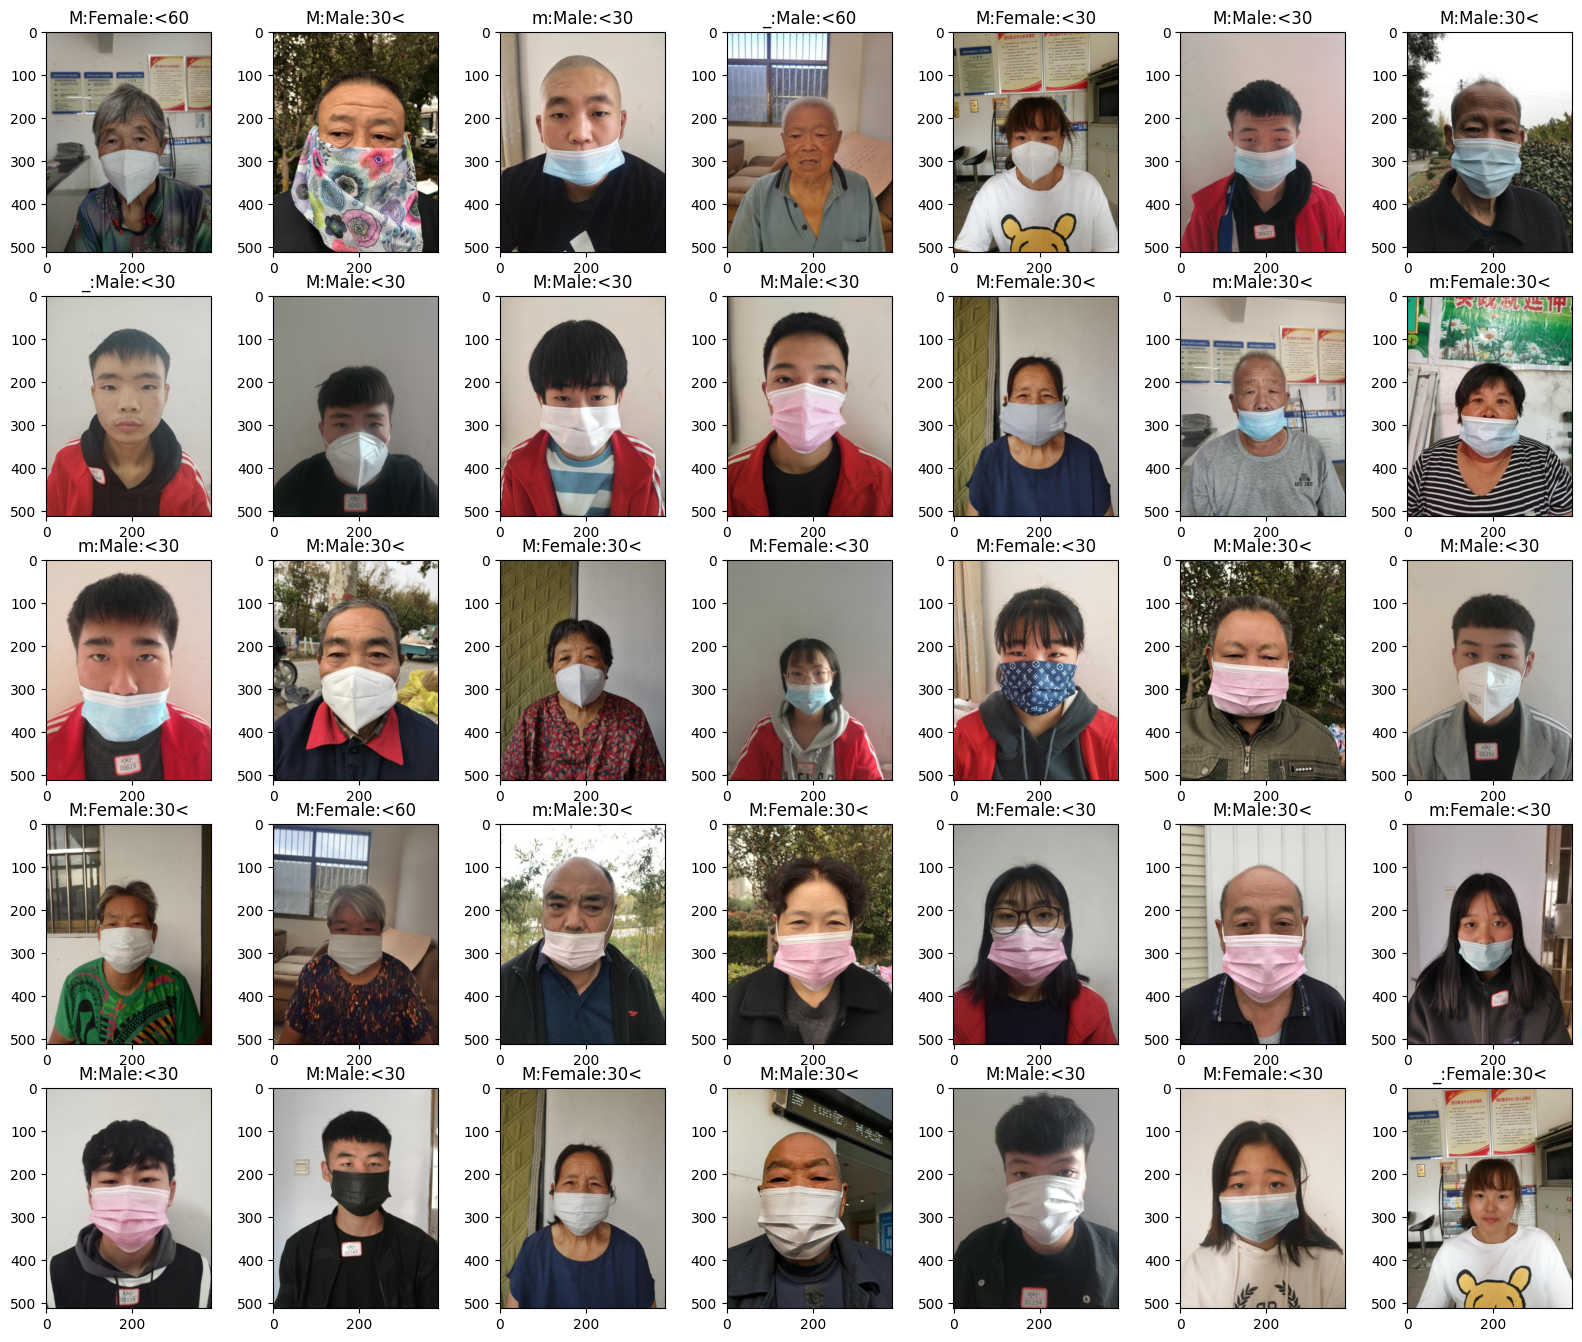

In [90]:
import os
import matplotlib.pyplot as plt
import cv2

def show_result(df):
    classname = ['M:Male:<30','M:Male:30<','M:Male:<60',
                 'M:Female:<30','M:Female:30<','M:Female:<60',
                 'm:Male:<30','m:Male:30<','m:Male:<60',
                 'm:Female:<30','m:Female:30<','m:Female:<60',
                 '_:Male:<30','_:Male:30<','_:Male:<60',
                 '_:Female:<30','_:Female:30<','_:Female:<60']
    plt.figure(figsize=(20, 20))
    columns = 7
    person_len = len(df)
    for person_id in range(person_len):
        filename = eval_dir_path + f"images/{df.iloc[person_id]['ImageID']}"
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(person_len // columns + 1, columns, person_id + 1)
        plt.imshow(img)
        plt.gca().set_title(classname[df.iloc[person_id]['ans']])

output_samples = submissions_csv.sample(5 * 7)
show_result(output_samples)